<a href="https://colab.research.google.com/github/UsmanMani4/Neural_Network_From_Scratch/blob/main/NN_Scratch__Understanding_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load MNIST

In [5]:
from sklearn.datasets import fetch_openml
import numpy as np

# Fetch MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(int)

# Normalize input features to [0, 1]
X = X / 255.0


X_train = X[:1000].to_numpy()  # convert first 1000 samples to NumPy
y_train = y[:1000].to_numpy()  # convert labels to NumPy


# One-hot encoding
def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels]

y_train_onehot = one_hot_encode(y_train, 10)

print("MNIST sample shapes:", X_train.shape, y_train_onehot.shape)


MNIST sample shapes: (1000, 784) (1000, 10)


#Define Layers (Dense + ReLU)

In [6]:
class Dense:
    def __init__(self, input_dim, output_dim):
        self.W = np.random.randn(input_dim, output_dim) * 0.01
        self.b = np.zeros((1, output_dim))

    def forward(self, X_input):
        self.X_input = X_input
        self.Z_linear = np.dot(X_input, self.W) + self.b
        return self.Z_linear

    def backward(self, dZ_output, learning_rate):
        dW = np.dot(self.X_input.T, dZ_output)
        db = np.sum(dZ_output, axis=0, keepdims=True)
        dX_prev = np.dot(dZ_output, self.W.T)
        self.W -= learning_rate * dW
        self.b -= learning_rate * db
        return dX_prev

class ReLU:
    def forward(self, Z_input):
        self.Z_input = Z_input
        return np.maximum(0, Z_input)

    def backward(self, dA_output):
        return dA_output * (self.Z_input > 0)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

def cross_entropy_loss(pred_probs, true_onehot):
    m = true_onehot.shape[0]
    return -np.sum(true_onehot * np.log(pred_probs + 1e-9)) / m

def compute_accuracy(y_pred_probs, y_true_labels):
    y_pred_labels = np.argmax(y_pred_probs, axis=1)
    return np.mean(y_pred_labels == y_true_labels)


#Initialize Network

In [7]:
dense1 = Dense(784, 128)
relu1 = ReLU()
dense2 = Dense(128, 64)
relu2 = ReLU()
dense3 = Dense(64, 10)


#Training Loop (Mini-Batch for MNIST)

In [8]:
learning_rate = 0.01
num_epochs = 10
batch_size = 64
num_samples = X_train.shape[0]

loss_history = []

for epoch in range(num_epochs):
    # Shuffle data
    permutation = np.random.permutation(num_samples)
    X_train_shuffled = X_train[permutation]
    y_train_onehot_shuffled = y_train_onehot[permutation]
    y_train_shuffled = y_train[permutation]

    epoch_loss = 0  # accumulate batch losses

    for i in range(0, num_samples, batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch_onehot = y_train_onehot_shuffled[i:i+batch_size]

        # --- Forward Pass ---
        Z1 = dense1.forward(X_batch)
        A1 = relu1.forward(Z1)
        Z2 = dense2.forward(A1)
        A2 = relu2.forward(Z2)
        Z3 = dense3.forward(A2)
        y_pred = softmax(Z3)

        # --- Loss ---
        batch_loss = cross_entropy_loss(y_pred, y_batch_onehot)
        epoch_loss += batch_loss

        # --- Backward Pass ---
        dZ3 = y_pred - y_batch_onehot
        dA2 = dense3.backward(dZ3, learning_rate)
        dZ2 = relu2.backward(dA2)
        dA1 = dense2.backward(dZ2, learning_rate)
        dZ1 = relu1.backward(dA1)
        _ = dense1.backward(dZ1, learning_rate)

    # Average loss over batches
    avg_epoch_loss = epoch_loss / (num_samples // batch_size)
    loss_history.append(avg_epoch_loss)

    # --- Epoch Accuracy (on full training set) ---
    Z1 = dense1.forward(X_train)
    A1 = relu1.forward(Z1)
    Z2 = dense2.forward(A1)
    A2 = relu2.forward(Z2)
    Z3 = dense3.forward(A2)
    y_pred_full = softmax(Z3)
    acc = compute_accuracy(y_pred_full, y_train)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_epoch_loss:.4f}, Accuracy: {acc*100:.2f}%")


Epoch 1/10, Loss: 2.4568, Accuracy: 11.60%
Epoch 2/10, Loss: 2.4544, Accuracy: 11.60%
Epoch 3/10, Loss: 2.4438, Accuracy: 30.20%
Epoch 4/10, Loss: 2.2472, Accuracy: 42.80%
Epoch 5/10, Loss: 1.9642, Accuracy: 35.60%
Epoch 6/10, Loss: 1.3925, Accuracy: 66.50%
Epoch 7/10, Loss: 1.2834, Accuracy: 71.50%
Epoch 8/10, Loss: 1.5132, Accuracy: 70.30%
Epoch 9/10, Loss: 0.8553, Accuracy: 86.70%
Epoch 10/10, Loss: 0.6668, Accuracy: 79.90%


#Plot Loss Curve

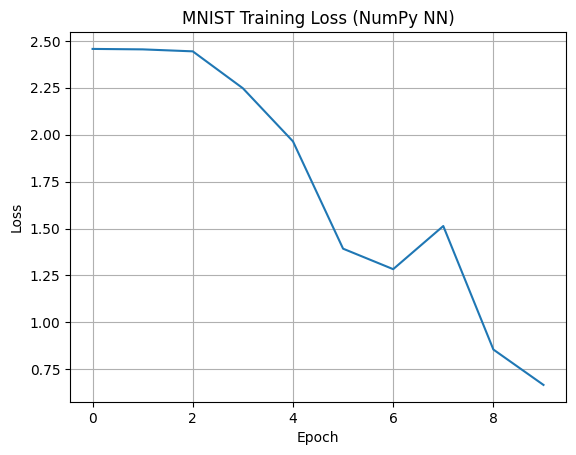

In [9]:
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("MNIST Training Loss (NumPy NN)")
plt.grid(True)
plt.show()


##Verify Sample

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Select random samples
num_samples_to_show = 10
indices = np.random.choice(X_train.shape[0], num_samples_to_show, replace=False)

X_samples = X_train[indices]
y_true_samples = y_train[indices]


##Forward Pass

In [11]:
# Forward pass
Z1 = dense1.forward(X_samples)
A1 = relu1.forward(Z1)
Z2 = dense2.forward(A1)
A2 = relu2.forward(Z2)
Z3 = dense3.forward(A2)
y_pred_samples = softmax(Z3)

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred_samples, axis=1)


##Prediction On MNIST

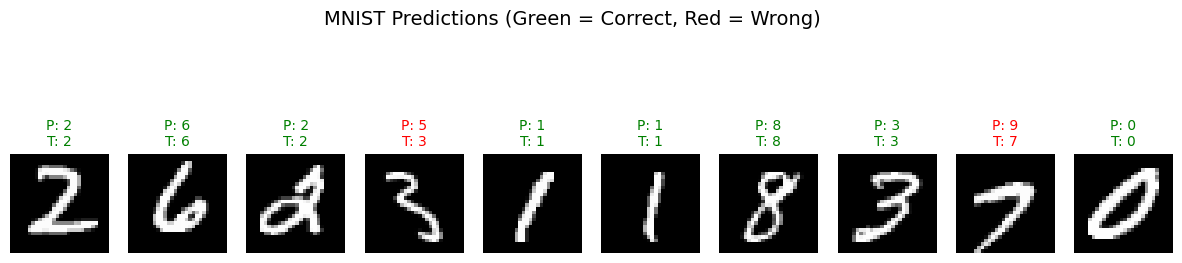

In [12]:
plt.figure(figsize=(15, 4))

for i in range(num_samples_to_show):
    plt.subplot(1, num_samples_to_show, i + 1)

    # Reshape 784 → 28x28
    image = X_samples[i].reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    title_color = 'green' if y_pred_labels[i] == y_true_samples[i] else 'red'
    plt.title(
        f"P: {y_pred_labels[i]}\nT: {y_true_samples[i]}",
        color=title_color,
        fontsize=10
    )

plt.suptitle("MNIST Predictions (Green = Correct, Red = Wrong)", fontsize=14)
plt.show()
